<a href="https://colab.research.google.com/github/titsitits/Python_Data_Science/blob/master/Completed_notebooks/8_Example_Ames_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mickaël Tits
CETIC
mickael.tits@cetic.be

# Chapitre 8 - Un exemple concret: estimation du prix d'une maison à Ames (Iowa, USA)

Dans ce Chapitre, nous allons analyser un vrai Dataset de biens immobiliers: le "Ames Housing Dataset". A partir de ces données, nous allons développer un modèle prédictif permettant d'estimer le prix d'une maison à partir de nombreuses caractéristiques, telles que sa surface, le nombre de pièces, différents indices de qualité, etc.

Plus d'informations ici: 
https://www.kaggle.com/c/home-data-for-ml-course/overview/description

http://jse.amstat.org/v19n3/decock.pdf

Détails sur les variables du dataset: https://github.com/titsitits/Python_Data_Science/blob/master/Donn%C3%A9es/data_description.txt

## Préparation/exploration du dataset

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

ames = pd.read_csv("https://raw.githubusercontent.com/titsitits/Python_Data_Science/master/Donn%C3%A9es/train.csv")

In [371]:
ames

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

Commençons par explorer brièvement la qualité des données.

On a 1460 observations (maisons), et 81 variables dont un Id et le prix de vente (SalePrice). 19 variables contiennent des données invalides ou manquantes.

In [0]:
#Quelques fonctions utiles pour l'exploration

#Par soucis de lisibilité, on affichera les series comme des dataframes d'une ligne
def display_series(series):  
  display(series.to_frame().transpose())
  
#Corrélation entre deux colonnes
def col_corr(df,col1,col2):  
  return df[[col1,col2]].corr().values[0,1]

#Pour analyser l'effet d'une variable continue sur une autre, on peut extraire deux groupes (chaque côté de la médiane), et afficher un boxplot par groupe
def mediangroups_boxplot_comparison(df, group_col, comparison_col):
  df["above_median"] = df[group_col] > df[group_col].quantile(0.5)
  df.boxplot(comparison_col, by = "above_median")
  df.pop("above_median")

#Pour analyser l'effet d'une variable continue sur une autre, on peut extraire deux groupes (chaque côté de la médiane), et calculer la moyenne par groupe
def mediangroups_mean_comparison(df, group_col, comparison_col):  
  means = df.groupby(df[group_col] > df[group_col].quantile(0.5))[comparison_col].mean()
  means.index = ['Below','Above']
  return means

#Idem en séparant les groupes avec la moyenne
def meangroups_mean_comparison(df, group_col, comparison_col):
  means = df.groupby(df[group_col] > df[group_col].mean())[comparison_col].mean()
  means.index = ['Below','Above']
  return means

In [373]:
print(ames.shape)
print(list(ames.columns))

#Colonnes incomplètes
counts = ames.count()
incomplete = counts[counts < len(ames)]
display_series(incomplete.sort_values())
len(incomplete.index)

(1460, 81)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtQual,BsmtCond,MasVnrArea,MasVnrType,Electrical
0,7,54,91,281,770,1201,1379,1379,1379,1379,1379,1422,1422,1423,1423,1423,1452,1452,1459


19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72fdcb8160>]],
      dtype=object)

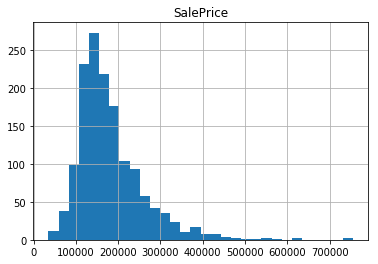

In [374]:
ames.hist("SalePrice", bins = 30)

### Données manquantes

sur les 19 variables incomplètes, 3 sont des variables numériques (les variables de type "float64"), et les autres sont des variables catégorielles (les variables de type "object").

Après vérification de la description des variables, on remarque que les variables catégorielles contiennent des "NA" comme catégories, et qui sont automatiquement interprétées comme des NaN par pandas. 

Pour les variables catégorielles, nous allons simplement remplacer les NaN par une catégorie "Nothing". Nous allons ensuite analyser et corriger chaque variable numérique.



In [375]:
#Pour vérifier le type d'une colonne: .dtypes()
display_series(ames.dtypes)
#Les variables catégorielles sont du type "object"

#Vérifions les données incomplètes uniquement:
incomplete_types = ames[incomplete.index].dtypes
display_series(incomplete_types)

#Trois variables de type "float64" contiennent des NaN
display_series(incomplete_types[incomplete_types == "float64"])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,...,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64


,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,float64,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object


,LotFrontage,MasVnrArea,GarageYrBlt
0,float64,float64,float64


#### Correction de variables catégorielles
Pour les variables catégorielles, remplaçons les NaN par la catégorie "Nothing".

In [0]:
cat_columns = ames.columns[ames.dtypes == 'object']
for col in cat_columns:
  ames[col] = ames[col].fillna('Nothing')

#### Exploration et correction des variables numériques
Analysons la qualité de chaque variable: quelle est la proportion de données manquantes ?

In [377]:
counts = ames.count()
incomplete = counts[counts < len(ames)]
display_series(incomplete.sort_values())

,LotFrontage,GarageYrBlt,MasVnrArea
0,1201,1379,1452


Est-ce que le fait que la variable soit manquante est en soi une information intéressante ? autrement dit, est-ce que ça a une influence sur le prix ?

In [378]:
#Mean price for NaNs and for non-NaNs
display(ames.groupby(ames.LotFrontage.isna())["SalePrice"].agg(['median','mean']))
display(ames.groupby(ames.GarageYrBlt.isna())["SalePrice"].agg(['median','mean']))
display(ames.groupby(ames.MasVnrArea.isna())["SalePrice"].agg(['median','mean']))

,median,mean
LotFrontage,,
False,159500,180770.480433
True,172400,181620.073359


,median,mean
GarageYrBlt,,
False,167500,185479.511240
True,100000,103317.283951


,median,mean
MasVnrArea,,
False,162700,180615.063361
True,203287,236484.250000


L'absence de LotFrontage ne semble pas avoir beaucoup d'influence sur le prix. Les deux autres variables ont une influence. GarageYrBlt = NaN signifie probablement qu'il n'y a pas de garage (ce qui diminue la valeur), et MasVnrArea = NaN semble augmenter la valeur en moyenne.

Pour une comparaison plus complète, nous pouvons visualiser les distributions des valeurs NaNs et non-NaN pour chacune de ces variables:

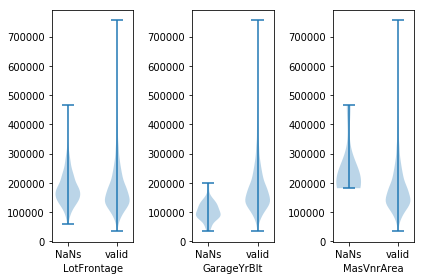

In [379]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1,3)

for ax, feat in zip(axes, ['LotFrontage', 'GarageYrBlt','MasVnrArea']):
  ax.violinplot(dataset = [ames[ames[feat].isna()]['SalePrice'].values, ames[ames.notna()]['SalePrice'].values] )
  ax.set_xlabel(feat)
  ax.set_xticks([1,2])
  ax.set_xticklabels(['NaNs','valid'])

#Permet d'éviter l'overlap entre les subplots
plt.tight_layout()

##### MasVnrArea

0.4774930470957107


,Below,Above
SalePrice,157293.746835,215662.741117


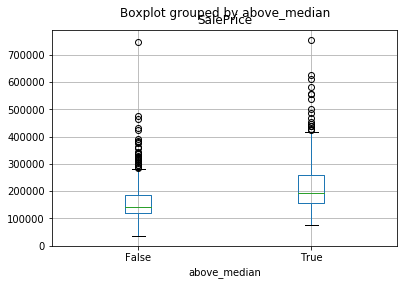

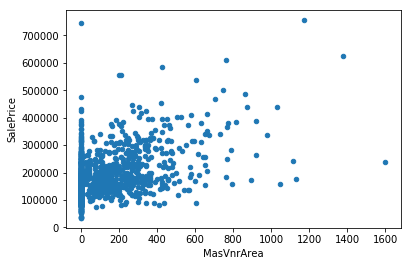

In [380]:
#Analysons la relation entre "MasVnrArea" et le prix
print(col_corr(ames,"MasVnrArea","SalePrice"))
display_series(mediangroups_mean_comparison(ames,"MasVnrArea","SalePrice"))
mediangroups_boxplot_comparison(ames,"MasVnrArea","SalePrice")
ames.plot.scatter("MasVnrArea","SalePrice")
#Il semblerait que l'influence soit positive

#Une possibilité pour prendre en compte cette information est de remplacer les NaN la moyenne de la colonne (ce qui minimisera l'influence de la variable pour ces observations particulières), et d'ajouter une colonne "isnan_MasVnrArea" pour garder l'information
#La relation entre "MasVnrArea" et "SalePrice" ne devrait pas être trop faussée de cette manière, étant donné que le nombre de NaN est assez faible (81).
ames["isnan_MasVnrArea"] = ames.MasVnrArea.isna().astype(int) #.astype(int) permet de rendre la variable numérique. #.astype(str) permettrait d'en faire une variable catégorielle
ames["MasVnrArea"] = ames["MasVnrArea"].fillna(ames["MasVnrArea"].median())

##### LotFrontage

0.35179909657067854


,Below,Above
SalePrice,162409.166279,207455.105


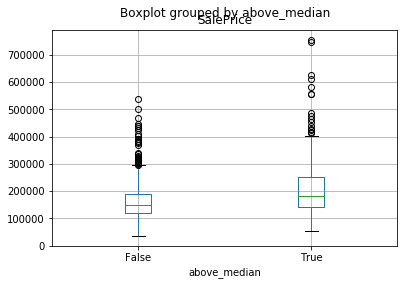

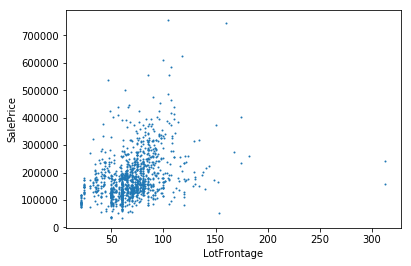

In [381]:
#Analysons la relation entre "LotFrontage" et le prix
print(col_corr(ames,"LotFrontage","SalePrice"))
display_series(mediangroups_mean_comparison(ames,"LotFrontage","SalePrice"))
mediangroups_boxplot_comparison(ames,"LotFrontage","SalePrice")
ames.plot.scatter("LotFrontage","SalePrice", s = 1)

#Ajoutons une variable isnan_LotFrontage pour pouvoir utiliser cette information dans notre modèle plus tard:
ames["isnan_LotFrontage"] = ames.LotFrontage.isna().astype(int)
#Ensuite, étant donné le grand nombre de NaNs (~18%), il est préférable (dans une premier temps) de ne pas utiliser cette variable en remplaçant les NaN par la moyenne
#Une autre possibilité serait d'entraîner un modèle de régression pour prédire ces données manquantes à partir des autres variables.
out = ames.pop("LotFrontage")

On ne peut pas considérer Lotfrontage = NaN comme 0, auquel cas le prix moyen serait plus faible que pour les autres maisons. Il est préférable d'omettre la variable vu la quantité de NaN (plus de 10%). Remplacer NaN par une valeur apporterait des informations erronnées, et omettre les observations réduirait significativement la taille du dataset.

##### GarageYrBlt

,count,mean,std,min,25%,50%,75%,max
GarageArea,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


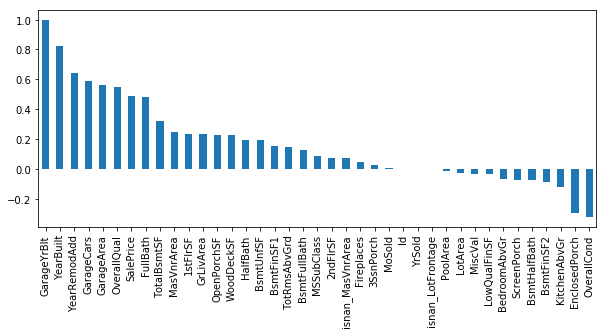

In [382]:
#Concernant l'année de construction du garage, une valeur nulle n'aurait aucun sens.
#On peut vérifier que la NaN correspond simplement à une absence de garage. En effet, leur surface est toujours nulle:
display_series(ames[ames.GarageYrBlt.isna()].GarageArea.describe())
#L'information sur l'absence de garage est donc déjà présente dans une autre variable. 

ames.corrwith(ames["GarageYrBlt"]).sort_values(ascending = False).plot.bar(figsize = (10,4))
#On remarque aussi que l'année de construction du garage est logiquement corrélée avec l'année de construction du bien.
#Pour remplir les quelques NaN, on peut éventuellement "simuler" une date de construction du garage avec l'année de construction.
ames["GarageYrBlt"] = ames["GarageYrBlt"].fillna(ames["YearBuilt"])

#### Suppression des variables inutiles

In [0]:
out = ames.pop("Id")

#### Tout en une fonction
Il est intéressant de redéfinir le pipeline de correction avec une fonction, pour pouvoir le réappliquer plus tard sur de nouvelles données (le set de test par exemple)

In [0]:
def clean_df(df):
  #Fill categorical columns
  cat_columns = df.columns[df.dtypes == 'object']
  for col in cat_columns:
    df[col] = df[col].fillna('Nothing')
  
  #Clean MasVnrArea
  df["isnan_MasVnrArea"] = df.MasVnrArea.isna().astype(int)
  df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())
  
  #Clean LotFrontage
  df["isnan_LotFrontage"] = df.LotFrontage.isna().astype(int)
  df = df.drop("LotFrontage", axis=1)
  
  #Clean GarageYrBlt
  df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["YearBuilt"])
  
  #Suppression des variables inutiles
  out = df.pop("Id")
  
  return df

## Sélection de variables prédictives

### Analyse de corrélation (variables continues)

Remarque: les méthodes pandas.DataFrame.corr() et .corrwith() omettent automatiquement les variables non-numériques.

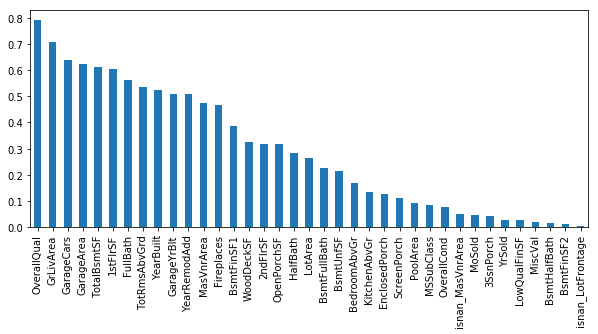

In [385]:
from matplotlib import pyplot as plt

#corrélations des variables avec le prix
corr_with_price = ames.corrwith(ames["SalePrice"])

#On trie les variables selon la valeur absolue de leur corrélation avec le prix
best_features = corr_with_price.abs().sort_values(ascending=False)

# On ne évidemment peut utiliser le label comme variable prédictive
best_features.pop("SalePrice")

best_features.plot.bar(figsize=(10,4))

best_features = best_features.index.to_list()

### Analyse basique d'effet des variables continues

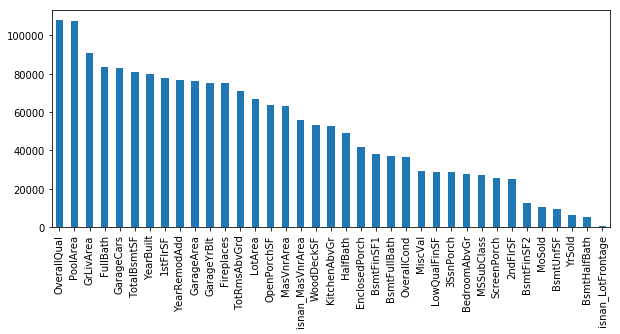

In [386]:
#Analyse de l'effet
continuous_col = ames.columns[(ames.dtypes == 'int64') | (ames.dtypes == 'float64')]

delta_mean = []

for col in list(continuous_col):  
  means = meangroups_mean_comparison(ames, col, "SalePrice")
  delta_mean.append( means[1] - means[0] )

best_features_effects = pd.Series(delta_mean, continuous_col).abs().sort_values(ascending = False)
best_features_effects = best_features_effects.drop("SalePrice")
best_features_effects.plot.bar(figsize=(10,4))

best_features_effects = best_features_effects.index.to_list()

Les résultats sont assez similaires. En réalité, les différences principales se trouvent pour les variables dont la distribution est fortement asymmétrique (e.g.: PoolArea est la plupart du temps 0, tout comme isnan_MasVnrArea)

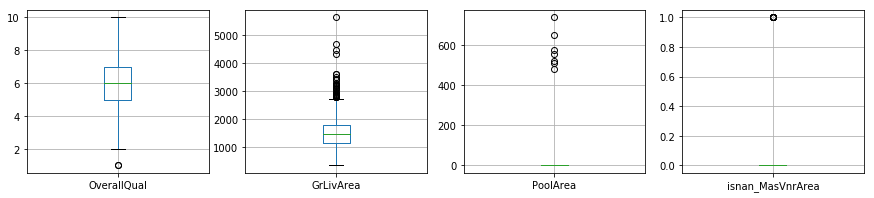

In [387]:
fig, axes = plt.subplots(1,4,figsize = (15,3))
ames.boxplot("OverallQual", ax = axes[0])
ames.boxplot("GrLivArea", ax = axes[1])
ames.boxplot("PoolArea", ax = axes[2])
ames.boxplot("isnan_MasVnrArea", ax = axes[3])

## Préparation des sets d'entraînement et de validation

### Sélection des variables prédictives (features)

In [0]:
#Prenons les cinq meilleures variables prédictives (en sa basant sur leur corrélation avec le prix, ou le delta de la moyenne)
featurelist = best_features[:5]
#featurelist = best_features_effects[:5]

X = ames[featurelist]
y = ames["SalePrice"]

### Séparation des données d'entraînement et de validation

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np

ids = ames.index

trainids, valids = train_test_split(ids, test_size = 0.4, random_state = 1)

#Pour avoir à chaque fois des ids différents, il suffit de ne pas fixer l'état pseudo alétoire "random_state":
#trainids, valids = train_test_split(ids, test_size = 0.4)

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

#Remarque: ce code est équivalent, mais le but ici est de garder les mêmes ids pour comparer plusieurs modèles (ou pour calculer la moyenne des prédictions, voir fin du notebook)
#Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size = 0.4)

## Régression linéaire

In [390]:
from sklearn.linear_model import LinearRegression

price_predictor = LinearRegression()
price_predictor.fit(Xtrain, ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [391]:
import numpy as np
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE


print("R2 Scores (train, val):", price_predictor.score(Xtrain, ytrain), price_predictor.score(Xval, yval))

y_pred = price_predictor.predict(Xval)

print("biais:", np.mean(y_pred - yval.values) ) #si il est négatif: sous-évaluation (en moyenne), si il est positif: sur-évaluation
print("MAE:", MAE(yval.values, y_pred) )
print("RMSE:", np.sqrt(MSE(yval.values, y_pred)) )

#Tester en gardant ou en retirant les outliers; tester avec différentes ensembles de variables

R2 Scores (train, val): 0.7662346914049792 0.7477113803564559
biais: 143.5871107765132
MAE: 25257.404730679427
RMSE: 40835.29225417492


Remarque: les résultats seront un peu différents chaque fois qu'on relancera le code, étant donné la sélection aléatoire des sets d'entraînement et de validation.

## Comparaison pour différents nombres de variables prédictives

Text(0, 0.5, 'Maen Absolute Error')

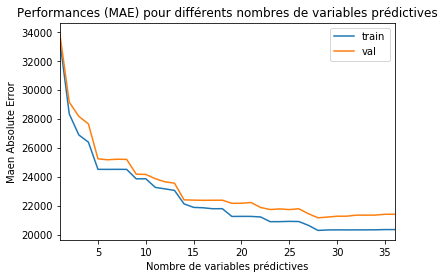

In [392]:
from sklearn.preprocessing import StandardScaler

maes = pd.DataFrame(columns = ['train','val'])

for n in range(1,len(best_features)):

  #Choix des variables
  featurelist = best_features[:n]
  #featurelist = best_features_effects[:n]
  
  #Commencer par les plus mauvaises
  #featurelist = best_features[::-1][:n]
  #featurelist = best_features_effects[::-1][:n]

  X = ames[featurelist]
  y = ames["SalePrice"]  
  
  Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]
  #scaler = StandardScaler()
  #Xtrain = scaler.fit_transform(Xtrain)
  #Xval = scaler.transform(Xval)
  price_predictor.fit(Xtrain, ytrain)
  trainpred = price_predictor.predict(Xtrain)
  valpred = price_predictor.predict(Xval)
  
  maes.loc[n] = MAE(ytrain, trainpred), MAE(yval, valpred)

maes.plot()
plt.title("Performances (MAE) pour différents nombres de variables prédictives")
plt.xlabel("Nombre de variables prédictives")
plt.ylabel("Maen Absolute Error")

In [393]:
maes['val'].min(), maes['val'].idxmin()

(21187.228717528884, 28)

* On peut constater que les 10-12 variables prédictives les moins corrélées à SalePrice sont (logiquement) assez inefficaces pour prédire le prix.
* Les meilleurs résultats en validation sont obtenus avec les 25-30 variables les plus corrélées au prix. (cela peut varier selon la sélection du set d'entraînement)



20316.58741840932 21187.228717528884
Mean average error:  21187.228717528884


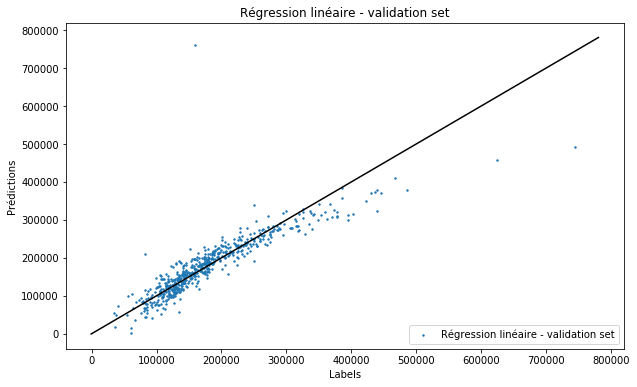

In [394]:
#Meilleur résultat en validation
featurelist = best_features[:28]

X = ames[featurelist]
y = ames["SalePrice"]

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

price_predictor.fit(Xtrain, ytrain)
trainpred = price_predictor.predict(Xtrain)
valpred = price_predictor.predict(Xval)

def display_results(labels, predictions, title = "Model results", figsize = (10,6), **kwargs):
  
  print("Mean average error: ", MAE(labels, predictions))  
  plt.scatter(labels, predictions, s=2, label = title, **kwargs)
  plt.gcf().set_size_inches(figsize)
  plt.title(title)
  plt.xlabel("Labels")
  plt.ylabel("Prédictions")
  prev_legend = plt.legend()
  plt.legend()
  xmin, xmax = plt.gca().get_xlim()
  plt.plot([xmin,xmax],[xmin,xmax], 'k')

print(MAE(ytrain, trainpred), MAE(yval, valpred))

display_results(yval, valpred, "Régression linéaire - validation set")

On constate que le nuage de doit semble former une légère courbe. Cela semble indiquer qu'il existe des relations non-linéaires, telles que des relations polynomiales entre les variables et le prix. La régression linéaire se base en effet sur l'hypothèse très simpliste que les relations seraient linéaires. Si on revisualise les nuages de points plus haut montrant l'interactions entre différentes variables (comme 'OverallQual') et le prix, on constate que la relation et plutôt quadratique que linéaire.

Une variation de la régression linéaire, appelée régression polynomiale, permet de facilement prendre en compte de potentielles interactions non-linéaires entre les variables, en créant de nouvelles variables à partir de polynômes des variables d'origine. Bien sûr, les possibilités ne se liminent pas aux polynômes.

##Régression polynomiale

In [0]:
def add_polynomials(X):
  #(remove some unwanted warnings)
  prev = pd.options.mode.chained_assignment
  pd.options.mode.chained_assignment = None
  for col in X.columns:
    #prise en compte des carrés des variables
    X[col+"_square"] = X[col]**2
    #prise en compte des racines carrées
    X[col+"_sqrt"] = X[col]**(1/2)
  
  pd.options.mode.chained_assignment = prev
  
  return X

MAE (train,val): 18935.991226609982 20230.204028521497
Mean average error:  20230.204028521497


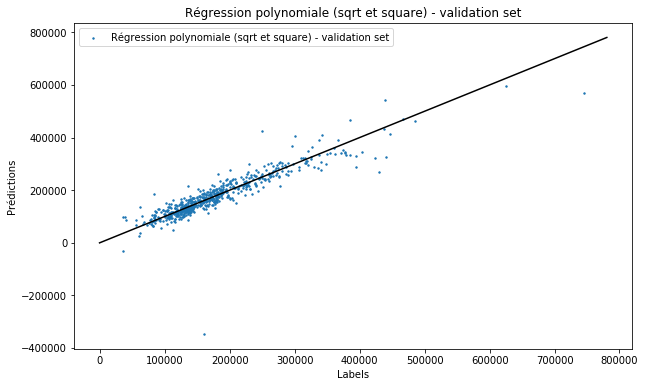

In [396]:
featurelist = best_features[:28]

X = ames[featurelist]
X = add_polynomials(X)

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]
price_predictor.fit(Xtrain, ytrain)
trainpred, valpred = price_predictor.predict(Xtrain), price_predictor.predict(Xval)

print("MAE (train,val):", MAE(trainpred, ytrain), MAE(valpred, yval))
display_results(yval, valpred, "Régression polynomiale (sqrt et square) - validation set")

Les prédiction semblent suivre une ligne droite. On remarque par contre que certaines prédictions parfois sont très mauvaises, et parfois même négatives (et peuvent aller jusqu'à -5.000.000 selon l'état pseudo-aléatoire utilisé).

Un simple bornage des prédictions entre les prix minimum et maximum du set d'entraînement permet de limiter ces erreurs exceptionnelles.

Néanmoins, selon les objectifs, il convient de définir une métrique d'évaluation appropriée: si quelques rares erreurs très grandes sont tolérables, ou si il est préférable d'avoir des prédictions globalement un peu moins précises mais sans gros écarts.
Dans tous les cas, on peut facilement améliorer les résultats en contraignant les prédictions entre des valeurs limites.

In [397]:
lowest_pred_index = yval.index[valpred.argmin()]
display_series(ames.loc[lowest_pred_index])

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isnan_MasVnrArea,isnan_LotFrontage
1298,60,RL,63887,Pave,Nothing,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,...,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,Nothing,Nothing,0,1,2008,New,Partial,160000,0,0


MAE (train,val): 18891.879496570047 19434.25335313196
Mean average error:  19434.25335313196


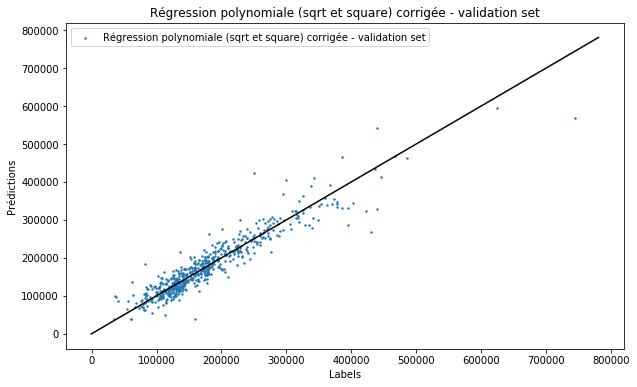

In [398]:
trainpred = trainpred.clip(ytrain.min(), ytrain.max())
valpred = valpred.clip(ytrain.min(), ytrain.max())

print("MAE (train,val):", MAE(trainpred, ytrain), MAE(valpred, yval))
display_results(yval, valpred, "Régression polynomiale (sqrt et square) corrigée - validation set")

## Comparaison pour différents nombres d'exemples (taille du training set)

Mean average error:  62075.304060146256
Mean average error:  66187.58959638455
Mean average error:  29063.136947200164
Mean average error:  21553.222971613843


Text(0, 0.5, 'Mean Absolute Error')

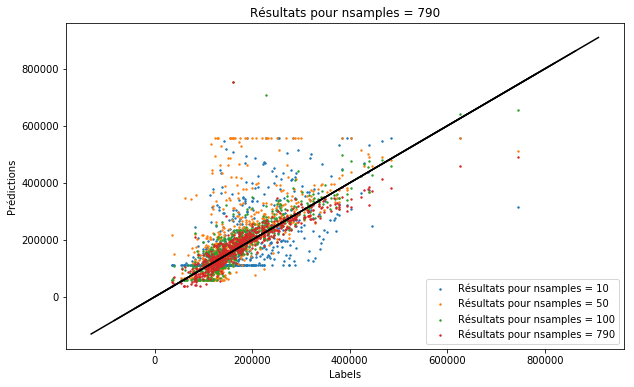

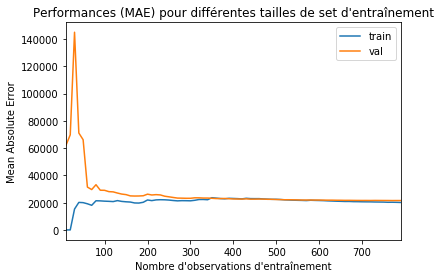

In [399]:
maes2 = pd.DataFrame(columns = ['train','val']) 

plot_limit = 0
leg = []

for nsamples in range(10,800,10):
  
  
  trainset, valset = train_test_split(ames, test_size = 660, random_state=1)
  
  #On extrait un sample sur le training set
  trainset_sample = trainset.sample(nsamples, random_state=1)
  
  Xtrain = trainset_sample[featurelist]
  ytrain = trainset_sample["SalePrice"]
  
  Xval = valset[featurelist]
  yval = valset["SalePrice"]
  
  price_predictor.fit(Xtrain, ytrain)
  
  trainpred = price_predictor.predict(Xtrain)
  valpred = price_predictor.predict(Xval)  
  trainpred = trainpred.clip(ytrain.min(), ytrain.max())
  valpred = valpred.clip(ytrain.min(), ytrain.max())  
  maes2.loc[nsamples] = MAE(ytrain, trainpred), MAE(yval, valpred)
  if nsamples in [10,50,100,790]:    
    display_results(yval, valpred, "Résultats pour nsamples = " + str(nsamples))

maes2.plot()
plt.title("Performances (MAE) pour différentes tailles de set d'entraînement")
plt.xlabel("Nombre d'observations d'entraînement")
plt.ylabel("Mean Absolute Error")

On constate que les performances diminuent (l'erreur augmente) avec le nombre d'échantillons d'entraînement, et que les performances en validation sont au départ beaucoup plus faibles, ce qui est signe d'**overfitting**. En effet, en utilisant seulement 50 exemples (gauche du graphe), on remarque que le modèle compte presque autant de paramètres (un par variable prédictive). Dans ce cas, les paramètres peuvent être adaptés aux exemples spécifiques d'entraînement pour apprendre leur prédiction presque "par coeur". Le modèle n'est alors pas générique et fonctionne mal sur de nouvelles données (comme le montrent les faibles performances en validation). On constate ensuite que pour 400 échantillons d'entraînement, les performances en entraînement se stabilisent, et les performances en validation sont équivalentes, ce qui signifie que le nombre d'échantillons est suffisant (plus d'overfitting).

In [400]:
len(price_predictor.coef_)

28

## Performances réelles

Pour évaluer les performances réelles du modèles, nous devons utiliser un set de données qui n'a pas encore été utilisé, ni pour l'entraînement ni pour la validation. Cela permet de simuler une utilisation réelle du modèle, sur de nouvelles maisons (dont on voudrait estimer le prix). L'évaluation des performances à partir du set de validation seraient biaisée, car il a en effet permis de choisir les paramètres du modèles, en l'occurence le choix des variables prédictives (le modèle a donc été indirectement optimisé pour ces données spécifiques).

Sur la plateforme [Kaggle](https://www.kaggle.com/), pour garantir l'absence de biais lors du design du modèle, un set de test est généralement fourni séparément, et les labels ne sont volontairement pas fournis. L'utilisateur de la plateforme doit alors soumettre à la plateforme les prédictions données par le modèle développé, et reçoit le résultat de l'évaluation effectuée par la plateforme. Cela permet notamment de classer différents compétiteurs lors d'un concours: https://www.kaggle.com/competitions

Concernant le dataset utilisé, on peut soumettre des prédictions ici: https://www.kaggle.com/c/home-data-for-ml-course/overview/evaluation

Remarque: lorsque le concours ne sera fini, il sera toujours possible de récupérer les données complète ici: https://www.kaggle.com/prevek18/ames-housing-dataset



In [401]:
# Vérifions déjà les performances sur le set de validation
#Régression linéaire

X = ames[featurelist]
y = ames["SalePrice"]

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

price_predictor.fit(Xtrain, ytrain)

trainpreds = price_predictor.predict(Xtrain).clip(ytrain.min(), ytrain.max())
valpreds_lin = price_predictor.predict(Xval).clip(ytrain.min(), ytrain.max())

MAE(trainpreds,ytrain.values), MAE(valpreds_lin,yval.values)

(20164.0980898648, 21040.7804916666)

In [402]:
#Régression polynomiale
X = ames[featurelist]
X = add_polynomials(X)

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

poly_predictor = LinearRegression()
poly_predictor.fit(Xtrain, ytrain)

trainpreds = poly_predictor.predict(Xtrain).clip(ytrain.min(), ytrain.max())
valpreds_poly = poly_predictor.predict(Xval).clip(ytrain.min(), ytrain.max())

MAE(trainpreds,ytrain.values), MAE(valpreds_poly,yval.values)

(18891.879496570047, 19434.25335313196)

Mean average error:  21040.7804916666
Mean average error:  19434.25335313196


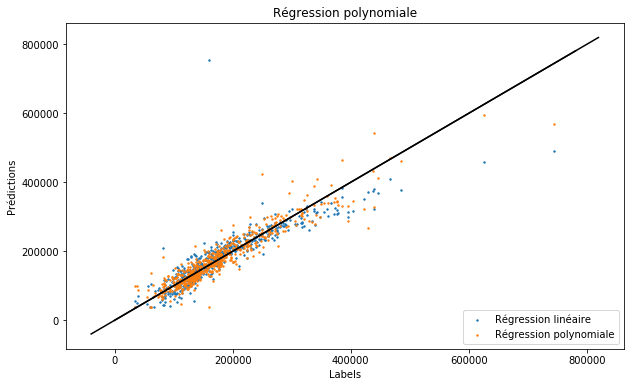

In [403]:
display_results(yval.values, valpreds_lin, "Régression linéaire")
display_results(yval.values, valpreds_poly, "Régression polynomiale")

Remarquez que vous obtiendrez des résultats différents à chaque fois que vous relancez les cellules ci-dessus avec un random_state différent: cela est dû à la séparation aléatoire des sets d'entraînement et de validation. 

Afin d'avoir un indicateur plus robuste du modèle, une possibilité serait de calculer une moyenne de ces résultats, ou d'utiliser un processus de **k-fold cross-validation**: on découpe l'ensemble des données en k échantillons, et pour chaque échantillon on entraînement un modèle sur les autres données, et on calcule les prédictions pour l'échantillon gardé de côté. On calcule de cette manière des prédictions pour chaque échantillon et on extrait une mesure (e.g., MAE) sur l'ensemble des prédictions.

### Vérification du set de test

In [404]:
testset = pd.read_csv("https://raw.githubusercontent.com/titsitits/Python_Data_Science/master/Donn%C3%A9es/test.csv")

ids = testset['Id']

print(len(testset))

#nettoyage du testset
testset = clean_df(testset)

#Colonnes incomplètes
counts = testset.count()
incomplete = counts[counts < len(testset)]
display_series(incomplete.sort_values())
len(incomplete.index)

1459


,BsmtFullBath,BsmtHalfBath,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageCars,GarageArea
0,1457,1457,1458,1458,1458,1458,1458,1458


8

Il reste deux observations contenant des variables invalides. On va simplement remplacer les valeurs manquantes par les moyennes. Si le nombre d'observations à nettoyer était plus conséquent, il serait pertinent d'analyser les variables à corriger.

In [0]:
for col in incomplete.index:
  testset[col] = testset[col].fillna(ames[col].mean())

### Soumission des résultats

In [0]:
X = ames[featurelist]
y = ames["SalePrice"]
#On peut ré-entraîner le modèle sur tout le dataset (entraînement+validation), pour le rendre potentiellement plus robuste
price_predictor.fit(X, y)

#select features
Xtest = testset[featurelist]

testpreds_lin = price_predictor.predict(Xtest).clip(ytrain.min(), ytrain.max())

submission = ids.to_frame()
submission["SalePrice"] = testpreds_lin
submission.to_csv("mysubmission_linear_regression.csv", index = False)

In [0]:
Xtest2 = add_polynomials(Xtest)

X = ames[featurelist]
X = add_polynomials(X)
poly_predictor.fit(X, y)

testpreds_poly = poly_predictor.predict(Xtest2).clip(ytrain.min(), ytrain.max())

submission = ids.to_frame()
submission["SalePrice"] = testpreds_poly
submission.to_csv("mysubmission_polynomial_regression.csv", index = False)

## Exploration de base des variables catégorielles

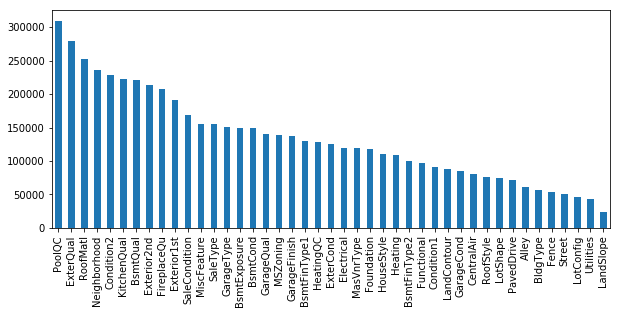

In [408]:
#Analysons l'effet de chaque variable catégorielle

all_columns = ames.columns
cat_columns = ames.columns[ames.dtypes == 'object']

diffs_per_group = []

#Bonus: vous pouvez afficher des graphes pour chaque groupe
#ncols = 8
#ncats = len(cat_columns)
#fig, axes = plt.subplots(int(np.ceil(ncats/ncols)),ncols, figsize = (20,30))

i=0
for cat in cat_columns:  
  
  group_means = ames.groupby(cat)["SalePrice"].mean()
  diffs_per_group.append(group_means.max() - group_means.min())
  
  #Bonus: vous pouvez afficher des graphes pour chaque groupe
  #plt.figure(figsize=(10,3))
  #group_means.plot.bar()
  #ax = axes[int(i/ncols), int(i%ncols)]
  #ames.boxplot("SalePrice", by=cat, ax = ax)
  i=i+1

best_cats = pd.Series(diffs_per_group, list(cat_columns)).abs().sort_values(ascending = False)
best_cats.plot.bar(figsize=(10,4))

best_cats = best_cats.index.to_list()

## Bonus - Un algorithme plus moderne: catboost

In [409]:
#Installer un nouveau package: on appelle une ligne de commande linux grâce au symbole "!". On utilise le gestionnaire de packages python pip pour installer un nouveau package
!pip install catboost

In [0]:
contfeatures = best_features[:28]
catfeatures = best_cats[:-5] #on retire les plus mauvaises

newfeaturelist =  contfeatures + catfeatures

In [0]:
X = ames[newfeaturelist]
y = ames["SalePrice"]

Xtrain, Xval, ytrain, yval = X.loc[trainids], X.loc[valids], y.loc[trainids], y.loc[valids]

In [412]:
import numpy as np
from catboost import Pool, CatBoostRegressor


cat_feature_ids = [i for i in range(len(newfeaturelist)) if newfeaturelist[i] in catfeatures]


train_pool = Pool(Xtrain.values, ytrain.values, cat_features=cat_feature_ids)
val_pool = Pool(Xval, yval, cat_features=cat_feature_ids) 
all_pool = Pool(X, y, cat_features=cat_feature_ids) 

# Spécification des paramètres d'entraînement du modèle
model = CatBoostRegressor(iterations=300, 
                          depth=3, 
                          learning_rate=0.2, 
                          loss_function='RMSE')
#Entraînement du modèle
model.fit(train_pool, silent=True)

In [413]:
# Réalisation de la prédiction en utilisant le modèle obtenu
trainpreds = model.predict(train_pool)
valpreds = model.predict(val_pool)

MAE(trainpreds,ytrain.values), MAE(valpreds,yval.values)

(10597.91476970661, 16062.060530924047)

In [414]:
# Spécification des paramètres d'entraînement du modèle
model = CatBoostRegressor(iterations=300, 
                          depth=3, 
                          learning_rate=0.2, 
                          loss_function='RMSE')

#Entraînement du modèle, avec un critère d'arrêt lorsque les performances en validation baissent: éviter le surentraînement (overfitting)
model.fit(train_pool,eval_set = val_pool, early_stopping_rounds = 100, silent = True)

In [415]:
# Réalisation de la prédiction en utilisant le modèle obtenu
trainpreds = model.predict(train_pool)
valpreds_catboost = model.predict(val_pool)

#Pour éviter de prédire des valeurs anormales, on limite les prédictions au range du set d'entraînement
trainpreds = trainpreds.clip(ytrain.min(), ytrain.max())
valpreds = valpreds.clip(ytrain.min(), ytrain.max())

MAE(trainpreds,ytrain.values), MAE(valpreds_catboost,yval.values)

(10597.91476970661, 16062.060530924047)

Mean average error:  21040.7804916666
Mean average error:  19434.25335313196
Mean average error:  16062.060530924047


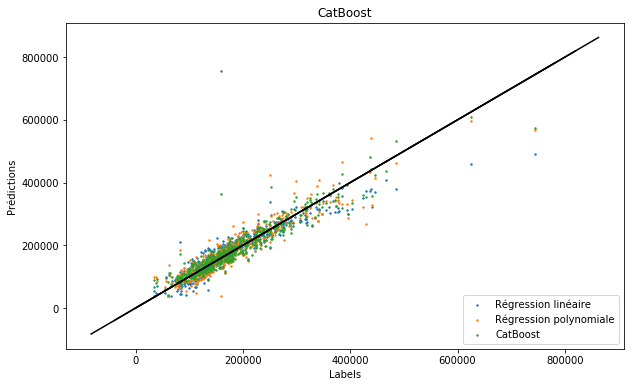

In [416]:
display_results(yval.values, valpreds_lin, "Régression linéaire")
display_results(yval.values, valpreds_poly, "Régression polynomiale")
display_results(yval.values, valpreds_catboost, "CatBoost")

### Soumission des résultats

In [0]:
Xtest = testset[newfeaturelist]
test_pool = Pool(Xtest.values, cat_features=cat_feature_ids)

#Pour la soumission, on peut éventuellement réentraîner le modèle sur toutes les données d'entraînement et de validation (pour espérer avoir un modèle plus générique. Cependant: attention à l'overfitting sans critère d'arrêt)
model.fit(all_pool, silent = True)

#Prédictions
testpreds_catboost = model.predict(test_pool).clip(ytrain.min(), ytrain.max())

submission = ids.to_frame()
submission["SalePrice"] = testpreds_catboost
submission.to_csv("mysubmission_catboost.csv", index = False)

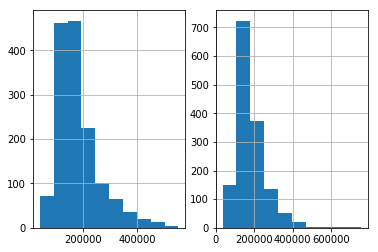

In [418]:
#Pour s'assurer de la plausibilité des résultats, on peut comparer leur distribution avec ceux du dataset d'entraînement
plt.subplot(1,2,1)
submission.SalePrice.hist()
plt.subplot(1,2,2)
ames.SalePrice.hist()

# Conclusion

Les résultats avec le fichier de baseline (sample_submission.csv) ont été obtenus avec une régression linéaire sur l'année et le mosi de vente, la surface du lot et le nombre de chambres. Les résultats de la soumission sur Kaggle donnent: 

`MAE = 59346`

Les trois soumissions proposées donnent:

* régression linéaire: 20391
* régression polynomiale: 19669
* catboost: 14465

Les algotihmes proposés prédisent donc bien mieux mieux les prix des maisons que la baseline.

Le résultat obtenu avec catboost amène à la place 544/13783 au classement de la compétition Kaggle. Il reste donc de la marge de manoeuvre pour améliorer le modèle. (Le meilleur score publique est actuellement à 11824).

Il existe de très nombreuses possibilités pour améliorer le modèle, dont par exemple:

* Vérifier plus profondément les données et supprimer d'éventuelles anomalies
* Tester d'autres ensembles de variables (en explorant plus profondément leurs relations et leur influence sur le prix)
* Créer de nouvelles variables pertinentes. Par exemple, à partir de la variable catégorielle "neighboorhood" et du prix moyen de chaque quartier, il est possible d'extraire une variable numérique indiquant le "standing" du quartier. Les nombreuses variables indiquant une échelle de qualité ("Excellent","Typical","Fair", ...) peuvent être traduites en variables numériques. Des variables "dummy" peuvent être extraites sur d'autres catégories. Il pourrait également être intéressant de considérer [année de construction du garage] - [année de construction de la maison], par exemple pour détecter les garages "intégrés" (plus jolis que les ajouts postérieurs?) ou, au contraire, les travaux de re-valuation récents. Des variables simplifiées peuvent être utilisées: indiquer simplement la présence ou non d'une piscine ?
* Les variables sont peut-être redondantes (elles apportent la même information), ce qui complexifie inutilement le modèle. Il peut être intéressant d'extraire un ensemble de variables apportant un maximum d'informations non-redondantes. E.g.: GarageArea et GarageCars apportent presque la même information.
* Optimiser les hyperparamètres des modèles utilisés grâce à une k-fold cross-validation (régularisation de la régression linéaire, paramètres d'apprentissage d'autres algorithmes; e.g. nombre et profondeur des arbres pour CatBoost, nombre d'itération et taux d'apprentissage)
* Tester d'autres algorithmes de machine learning (e.g.: support vector regression).
* Entraîner plusieurs modèles, et calculer une moyenne pondérée des prédictions (on parle de model blending, ou de ensemble learning)

Kaggle est une excellente source d'inspiration pour s'améliorer. On y trouve en effet de très nombreux notebooks (généralement en Python) proposant des idées intéressantes de feature engineering et de développement de modèles prédictifs. Par exemple, le notebook suivant est classé 26ème:
https://www.kaggle.com/itslek/stack-blend-lrs-xgb-lgb-house-prices-k-v17
La méthode propose certaines nouvelles variables prédictives simplifiées, ainsi que la moyenne pondérée de différents modèles prédictifs.



## Bonus - Un exemple basique de model blending

In [419]:
w1, w2, w3 = 0.02, 0.08, 0.9
valpreds_blend = w1*valpreds_lin + w2*valpreds_poly + w3*valpreds_catboost
MAE(yval, valpreds_blend)

15742.155442434165

In [0]:
testpreds_blend = w1*testpreds_lin + w2*testpreds_poly + w3*testpreds_catboost
submission = ids.to_frame()
submission["SalePrice"] = testpreds_blend
submission.to_csv("mysubmission_blend.csv", index = False)


* model blending:  `MAE = 14273`
Nouveau classement: 516/13783